# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [287]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [290]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [292]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Data Exploration

### 1. Data display and checking missing value

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB

Statistical Summary of Numerical Features:
        Clothing ID           Age  Positive Feedback Count  Recommended IND
count  18442.000000  18442.000000             18442.000000     18442.000000
mean     954.896757     43.383635                

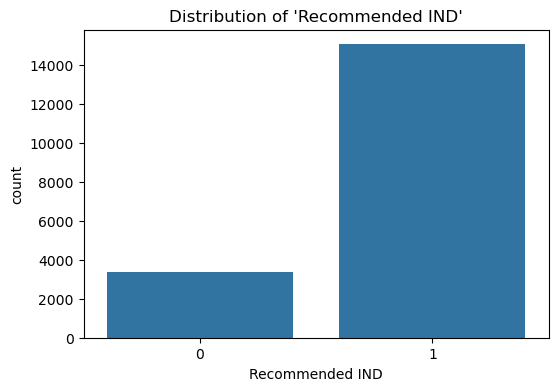

In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/reviews.csv')

# Display basic info about the dataset
print("Dataset Info:")
df.info()  # Check data types and null values

# Display a statistical summary of the numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())  # Statistical summary for numerical features

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())  # Preview the first few rows to get a sense of the data

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())  # Check for missing values across columns

# Visualize the distribution of the target variable 'Recommended IND'
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df)
plt.title("Distribution of 'Recommended IND'")
plt.show()


### 2. Data reprocessing

In [299]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Check the shape of 'Review Text' column
print("Review Text shape:", X_train['Review Text'].shape)
# Display the first few rows of the 'Review Text' column
print(X_train['Review Text'].head())

# Numeric feature transformation
numeric_features = ['Age', 'Positive Feedback Count']
numeric_transformer = StandardScaler()
# Scale the numeric features
X_numeric = numeric_transformer.fit_transform(X_train[numeric_features])
print("Numeric transformed shape:", X_numeric.shape)

# Categorical feature transformation
categorical_features = ['Clothing ID', 'Title', 'Division Name', 'Department Name', 'Class Name']
# Use OneHotEncoder to transform categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Set sparse_output to False
X_categorical = encoder.fit_transform(X_train[categorical_features])
print("Categorical transformed shape:", X_categorical.shape)

# Text feature transformation
text_features = ['Review Text']
# Use TfidfVectorizer to convert text data into numerical features
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(X_train[text_features].values.ravel())  # Ensure the column is 1D
print("Text transformed shape:", X_text.shape)

# Check the shape of the text feature before reshaping
print("X_text shape before reshape:", X_text.shape)

# Convert the sparse matrix to a dense matrix (if the data is not too large, we can inspect a part of it)
X_text_dense = X_text.toarray()

# Display the first few samples of the dense matrix
print("X_text before reshape (first 5 samples):", X_text_dense[:5])

# Combine numeric, categorical, and text features into a single feature matrix
X_transformed = np.hstack([X_numeric, X_categorical, X_text_dense])
print("Combined transformed shape:", X_transformed.shape)

# Ensure X_transformed and y_train have the same number of samples
print("X_transformed shape:", X_transformed.shape)
print("y_train shape:", y_train.shape)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear')  # Choose an appropriate classifier
model.fit(X_transformed, y_train)

# Evaluate the model's accuracy on the training data
accuracy = model.score(X_transformed, y_train)
print("Model accuracy:", accuracy)


Review Text shape: (16597,)
893      Easy and fun jumper. runs slightly large. i or...
1767     The dress looks great both in winter and summe...
4491     I wanted to love this dress as it seemed perfe...
17626    I loved this shirt when i purchased it but it ...
11184    I had to review this because i purchased befor...
Name: Review Text, dtype: object
Numeric transformed shape: (16597, 2)
Categorical transformed shape: (16597, 12492)
Text transformed shape: (16597, 12608)
X_text shape before reshape: (16597, 12608)
X_text before reshape (first 5 samples): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Combined transformed shape: (16597, 25102)
X_transformed shape: (16597, 25102)
y_train shape: (16597,)
Model accuracy: 0.9471591251430982


## Building Pipeline

In [301]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Numeric feature transformation
numeric_features = ['Age', 'Positive Feedback Count']
numeric_transformer = StandardScaler()

# Apply transformation to numeric features
X_numeric = numeric_transformer.fit_transform(X_train[numeric_features])
print("Numeric transformed shape:", X_numeric.shape)

# Categorical feature transformation
categorical_features = ['Clothing ID', 'Title', 'Division Name', 'Department Name', 'Class Name']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Set sparse_output to False

# Apply transformation to categorical features
X_categorical = encoder.fit_transform(X_train[categorical_features])
print("Categorical transformed shape:", X_categorical.shape)

# Text feature transformation
text_features = ['Review Text']
tfidf = TfidfVectorizer()

# Apply transformation to text features
X_text = tfidf.fit_transform(X_train[text_features].values.ravel())  # Ensure the column is 1D
print("Text transformed shape:", X_text.shape)

# Convert the sparse matrix to a dense matrix (if the data is not too large, we can inspect a part of it)
X_text_dense = X_text.toarray()

# Combine numeric, categorical, and text features into a single feature matrix
X_transformed = np.hstack([X_numeric, X_categorical, X_text_dense])
print("Combined transformed shape:", X_transformed.shape)

# Ensure X_transformed and y_train have the same number of samples
print("X_transformed shape:", X_transformed.shape)
print("y_train shape:", y_train.shape)


Numeric transformed shape: (16597, 2)
Categorical transformed shape: (16597, 12492)
Text transformed shape: (16597, 12608)
Combined transformed shape: (16597, 25102)
X_transformed shape: (16597, 25102)
y_train shape: (16597,)


## Training Pipeline

In [305]:
# Import necessary library for modeling
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear')  # Choose an appropriate classifier

# Fit the model to the transformed feature matrix
model.fit(X_transformed, y_train)

# Evaluate the model's accuracy on the training data
accuracy = model.score(X_transformed, y_train)
print("Model accuracy:", accuracy)


Model accuracy: 0.9471591251430982


## Fine-Tuning Pipeline

In [308]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid (example with Logistic Regression)
param_grid = {
    'C': [1],  # Regularization strength (simplified)
    'solver': ['liblinear']  # Solvers to try (simplified)
}

# Initialize the model (Logistic Regression)
model = LogisticRegression()

# Use StratifiedKFold to ensure balanced class distribution in each fold
stratified_kf = StratifiedKFold(n_splits=2)  # Simplified to 2 folds
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_kf, n_jobs=-1, verbose=1)

# Fit the grid search with the training data
grid_search.fit(X_transformed, y_train)

# Check the best parameters and results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters found:  {'C': 1, 'solver': 'liblinear'}
Best cross-validation score:  0.8746761966605379
